In [1]:
# Adds link to the scripts folder
import sys
import os
sys.path.append("../../scripts/")
import matplotlib.pyplot as plt
import numpy as np

from divergence import load_divergence_dict, WH_evo_rate

In [2]:
time_average = np.arange(0, 3100, 100)
divergence_dict = divergence.make_divergence_dict(time_average)

# Plot for rev / non_rev

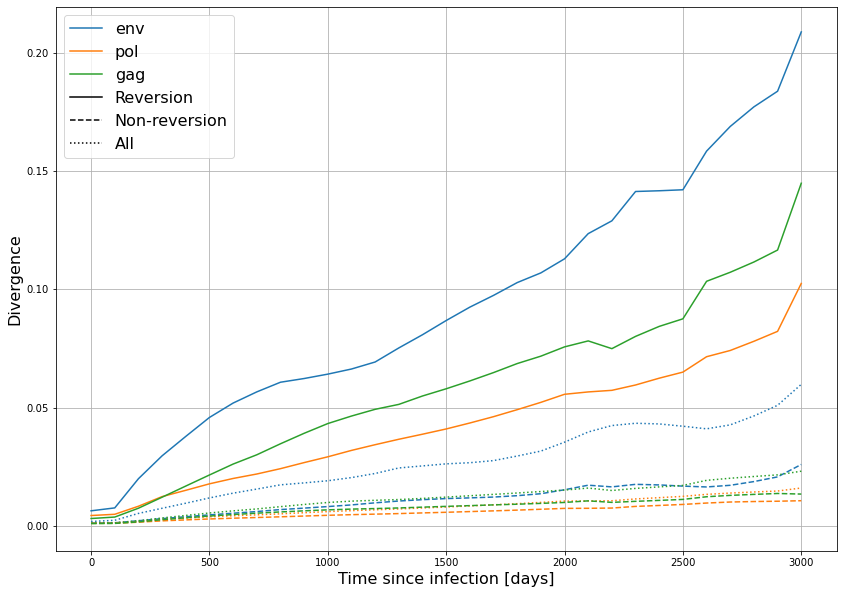

In [3]:
colors = ["C0", "C1", "C2", "C3", "C4", "C5", "C6", "C7", "C8", "C9"]
fontsize = 16

plt.figure(figsize=(14, 10))
for ii, region in enumerate(["env","pol","gag"]):
    plt.plot(time_average, divergence_dict[region]["all"]["rev"], '-', color=colors[ii], label=region)
    plt.plot(time_average, divergence_dict[region]["all"]["non_rev"], '--', color=colors[ii])
    plt.plot(time_average, divergence_dict[region]["all"]["all"], ':', color=colors[ii])
plt.plot([0], [0], 'k-', label="Reversion")
plt.plot([0], [0], 'k--', label="Non-reversion")
plt.plot([0], [0], 'k:', label="All")
plt.grid()
plt.xlabel("Time since infection [days]", fontsize=fontsize)
plt.ylabel("Divergence", fontsize=fontsize)
plt.legend(fontsize=fontsize)
plt.show()

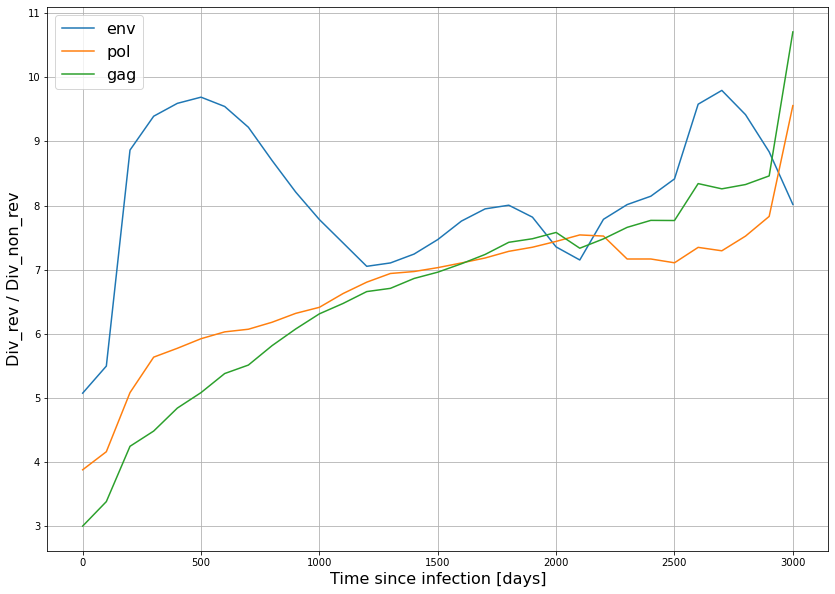

In [52]:
# Relative divergence
colors = ["C0", "C1", "C2", "C3", "C4", "C5", "C6", "C7", "C8", "C9"]
fontsize = 16

plt.figure(figsize=(14, 10))
for ii, region in enumerate(["env","pol","gag"]):
    plt.plot(time_average, divergence_dict[region]["all"]["rev"]/divergence_dict[region]["all"]["non_rev"], '-', color=colors[ii], label=region)
plt.grid()
plt.xlabel("Time since infection [days]", fontsize=fontsize)
plt.ylabel("Div_rev / Div_non_rev", fontsize=fontsize)
plt.legend(fontsize=fontsize)
plt.show()

In [2]:
divergence_dict = load_divergence_dict("../../divergence_dict")
patient_names = ["p1", "p2", "p3", "p4", "p5", "p6", "p8", "p9", "p11"]
colors = ["C0", "C1", "C2"]
linestyle = ["-", "--", ":"]

div_vector = {}
for ii, region in enumerate(["env", "pol", "gag"]):
    div_vector[region] = {}
    div_vector[region]["div_all"] = np.array([])
    div_vector[region]["div_rev"] = np.array([])
    div_vector[region]["div_non_rev"] = np.array([])
    for patient_name in patient_names:
        div_vector[region]["div_all"] = np.concatenate(
            (div_vector[region]["div_all"], divergence_dict[region][patient_name]["div_all"][-3:, :].flatten()))
        div_vector[region]["div_rev"] = np.concatenate(
            (div_vector[region]["div_rev"], divergence_dict[region][patient_name]["div_rev"][-3:, :].flatten()))
        div_vector[region]["div_non_rev"] = np.concatenate(
            (div_vector[region]["div_non_rev"], divergence_dict[region][patient_name]["div_non_rev"][-3:, :].flatten()))
        
div_vector["all"] = {}
for div_type in ["div_all", "div_rev", "div_non_rev"]:
    div_vector["all"][div_type] = np.array([])
    for region in ["env", "pol", "gag"]:
        div_vector["all"][div_type] = np.concatenate((div_vector["all"][div_type], div_vector[region][div_type]))

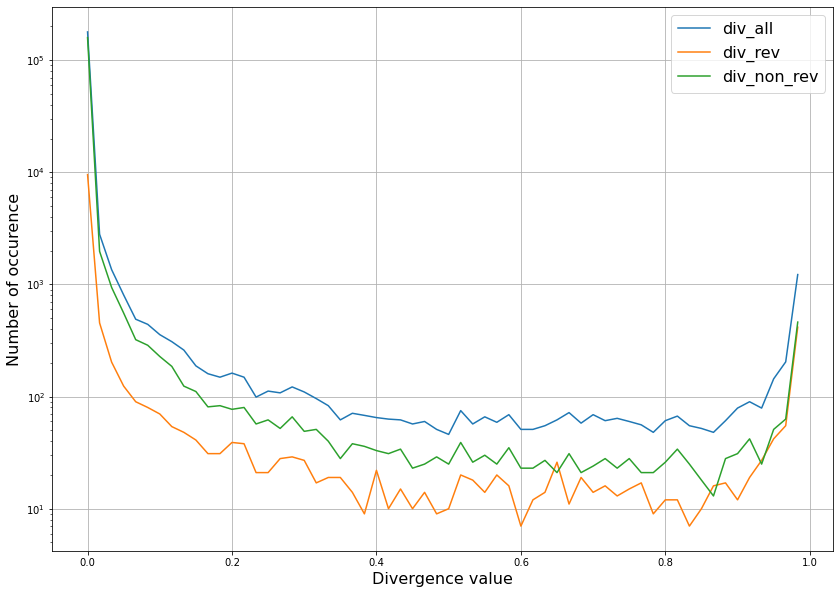

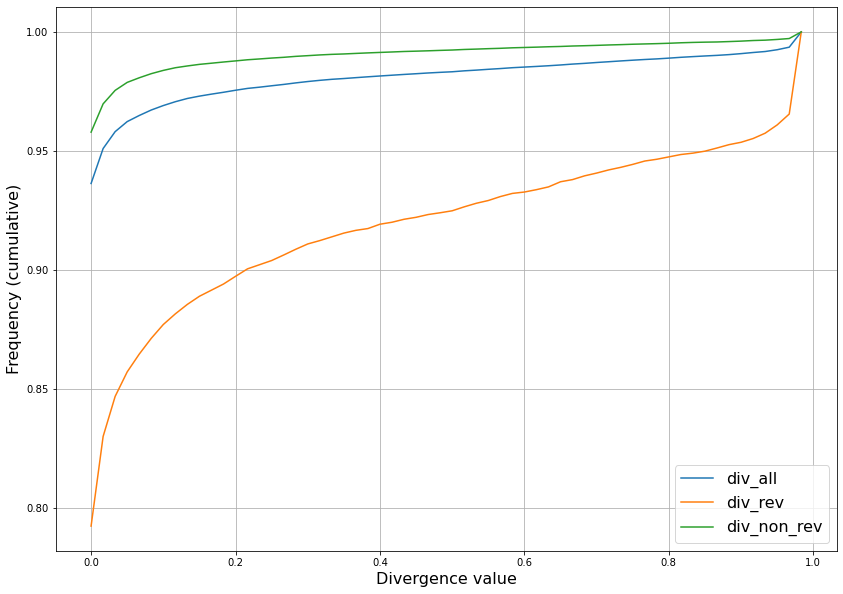

In [19]:
# Histo rev VS non_rev divergence
hist_dict = {}
for div_type in ["div_all", "div_rev", "div_non_rev"]:
    hist_dict[div_type], bins = np.histogram(div_vector["all"][div_type], bins=60, range=(0,1))

bins = bins[:-1]

# Non cumulative
plt.figure(figsize=(14,10))
for (ii, div_type) in enumerate(["div_all", "div_rev", "div_non_rev"]):
    plt.plot(bins, hist_dict[div_type], color=colors[ii], label=div_type)
plt.grid()
plt.xlabel("Divergence value", fontsize=16)
plt.ylabel("Number of occurence", fontsize=16)
plt.yscale("log")
plt.legend(fontsize=16)
plt.show()

# cumulative
plt.figure(figsize=(14,10))
for (ii, div_type) in enumerate(["div_all", "div_rev", "div_non_rev"]):
    tmp = hist_dict[div_type] / np.sum(hist_dict[div_type])
    tmp = np.cumsum(tmp)
    plt.plot(bins, tmp, color=colors[ii], label=div_type)
plt.grid()
plt.xlabel("Divergence value", fontsize=16)
plt.ylabel("Frequency (cumulative)", fontsize=16)
# plt.yscale("log")
plt.legend(fontsize=16)
plt.show()

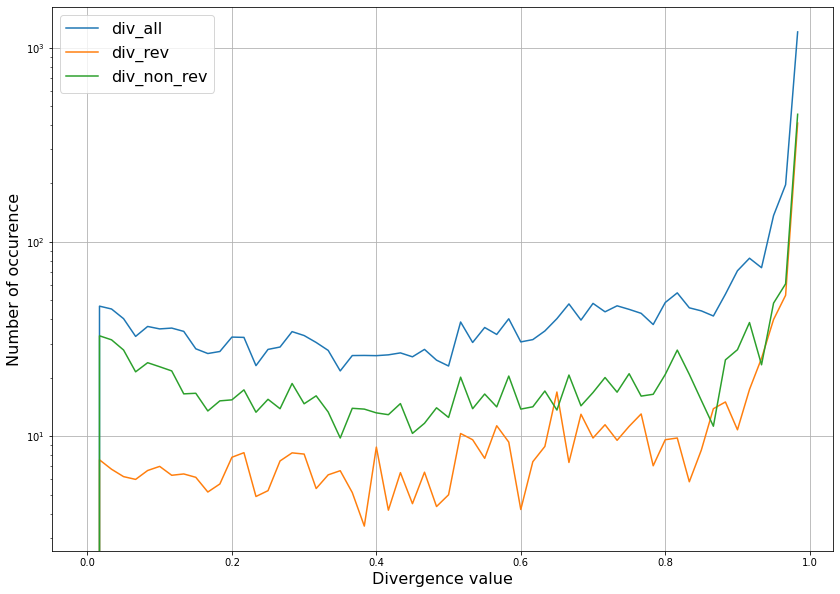

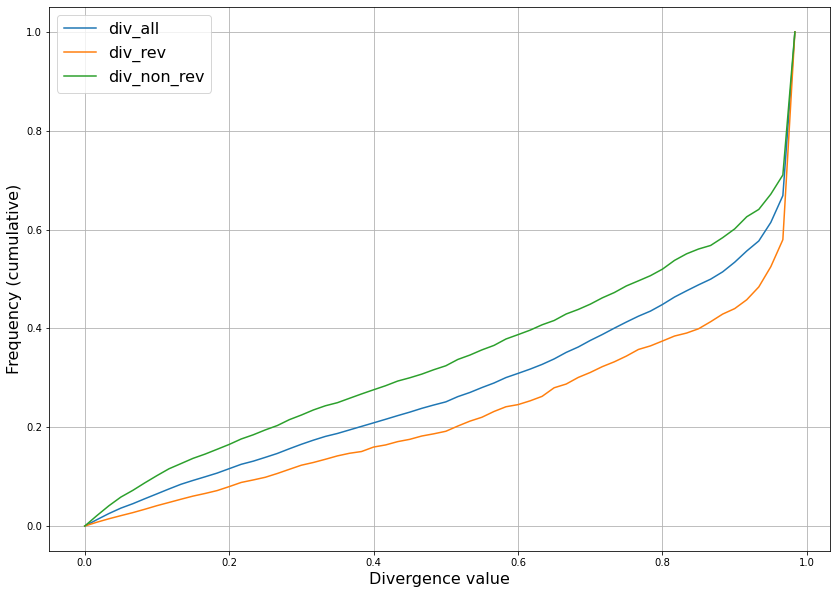

In [20]:
# Histo rev VS non_rev divergence relative => Relative contribution to total divergence
hist_dict = {}
for div_type in ["div_all", "div_rev", "div_non_rev"]:
    hist_dict[div_type], bins = np.histogram(div_vector["all"][div_type], bins=60, range=(0,1))

bins = bins[:-1]

# Non cumulative
plt.figure(figsize=(14,10))
for (ii, div_type) in enumerate(["div_all", "div_rev", "div_non_rev"]):
    plt.plot(bins, hist_dict[div_type]*bins, color=colors[ii], label=div_type)
plt.grid()
plt.xlabel("Divergence value", fontsize=16)
plt.ylabel("Number of occurence", fontsize=16)
plt.yscale("log")
plt.legend(fontsize=16)
plt.show()

# Cumulative
plt.figure(figsize=(14,10))
for (ii, div_type) in enumerate(["div_all", "div_rev", "div_non_rev"]):
    tmp = hist_dict[div_type]*bins / np.sum(hist_dict[div_type]*bins)
    tmp = np.cumsum(tmp)
    plt.plot(bins, tmp, color=colors[ii], label=div_type)
plt.grid()
plt.xlabel("Divergence value", fontsize=16)
plt.ylabel("Frequency (cumulative)", fontsize=16)
# plt.yscale("log")
plt.legend(fontsize=16)
plt.show()

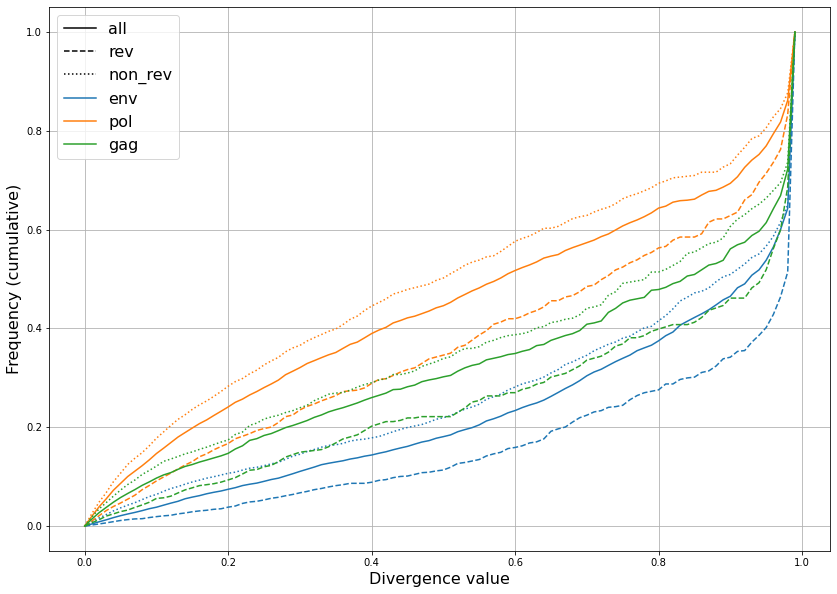

In [24]:
# Complete picture with splitting by region
hist_dict = {}
for ii, region in enumerate(["env", "pol", "gag"]):
    hist_dict[region] = {}
    for div_type in ["div_all", "div_rev", "div_non_rev"]:
        hist_dict[region][div_type], bins = np.histogram(div_vector[region][div_type], bins=100, range=(0,1))

bins = bins[:-1]
colors = ["C0", "C1", "C2"]
linestyle = ["-", "--", ":"]
        
plt.figure(figsize=(14,10))
for ii, region in enumerate(["env", "pol", "gag"]):
    for jj, div_type in enumerate(["div_all", "div_rev", "div_non_rev"]):
        tmp = hist_dict[region][div_type]*bins / np.sum(hist_dict[region][div_type]*bins)
        tmp = np.cumsum(tmp)
        plt.plot(bins, tmp, linestyle=linestyle[jj], color=colors[ii])

for linestyle, label in zip(linestyle, ["all", "rev", "non_rev"]):
    plt.plot([0], [0], linestyle=linestyle, color="k", label=label)

for color, label in zip(colors, ["env", "pol", "gag"]):
    plt.plot([0], [0], color=color, label=label)

plt.grid()
plt.xlabel("Divergence value", fontsize=16)
plt.ylabel("Frequency (cumulative)", fontsize=16)
plt.legend(fontsize=16)
plt.show()

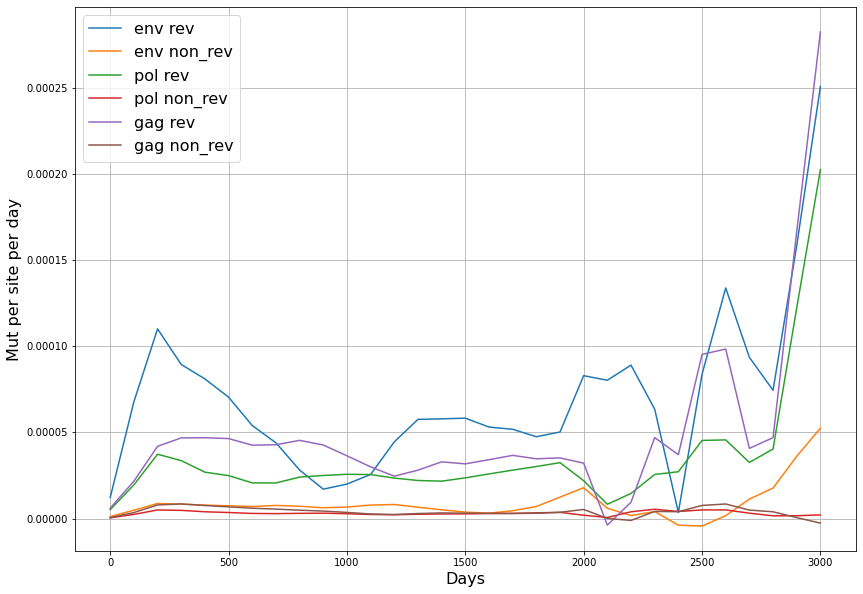

Evo rate env rev: 4.359235675797971e-05
Evo rate env non_rev: 6.733848418140007e-06
Evo rate pol rev: 2.5003995403308486e-05
Evo rate pol non_rev: 2.9455352543243033e-06
Evo rate gag rev: 3.562311899032241e-05
Evo rate gag non_rev: 3.7387085050198364e-06


In [7]:
# Evolution rate
time_average = np.arange(0, 3100, 100)
divergence_dict = load_divergence_dict("../../divergence_dict")
evo_rate_dict = WH_evo_rate(divergence_dict, time_average)

regions = ["env", "pol", "gag"]
time_interval = [500, 2000]

plt.figure(figsize=(14,10))
for region in regions:
    for mut_type in ["rev", "non_rev"]:
        plt.plot(time_average, evo_rate_dict[region][mut_type], label=region + " " + mut_type)
plt.grid()
# plt.yscale("log")
plt.legend(fontsize=16)
plt.xlabel("Days", fontsize=16)
plt.ylabel("Mut per site per day", fontsize=16)
plt.show()

for region in regions:
    for mut_type in ["rev", "non_rev"]:
        evo_rate = evo_rate_dict[region][mut_type]
        evo_rate = evo_rate[np.logical_and(time_average>time_interval[0],time_average<time_interval[1])]
        evo_rate = np.mean(evo_rate)
        print(f"Evo rate {region} {mut_type}: {evo_rate}")

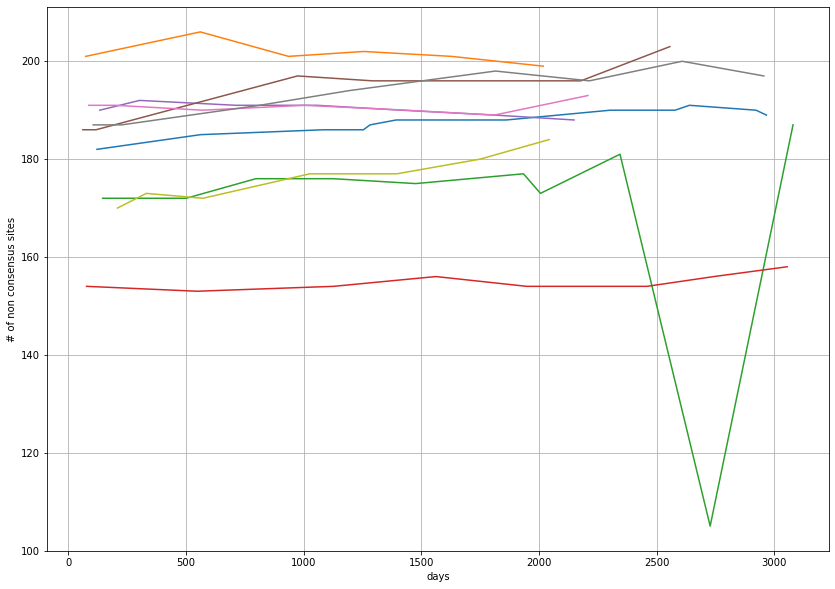

In [8]:
# Number of non consensus sites per patient
from hivevo.patients import Patient
from hivevo.HIVreference import HIVreference
import trajectory



patient_names = ["p1", "p2", "p3", "p4", "p5", "p6", "p8", "p9", "p11"]
region = "pol"

plt.figure(figsize=(14,10))
for patient in patient_names:
    patient = Patient.load(patient)
    aft = patient.get_allele_frequency_trajectories(region)
    ref = HIVreference(subtype="any")
    reversion_mask = trajectory.get_reversion_map(patient, region, aft, ref)
    reversion_mask = np.tile(reversion_mask, (aft.shape[0], 1, 1))
    aft2 = np.reshape(aft[reversion_mask], (aft.shape[0], -1))

    nb_non_consensus = []
    for ii in range(aft.shape[0]):
        nb_non_consensus += [np.sum(aft2[ii, :] < 0.5, dtype=int)]
    plt.plot(patient.dsi, nb_non_consensus)
plt.grid()
plt.xlabel("days")
plt.ylabel("# of non consensus sites")
plt.show()


# Plots for synonymous / non_synonymous

In [3]:
divergence_dict = load_divergence_dict("../../divergence_dict")
time_average = np.arange(0, 3100, 100)

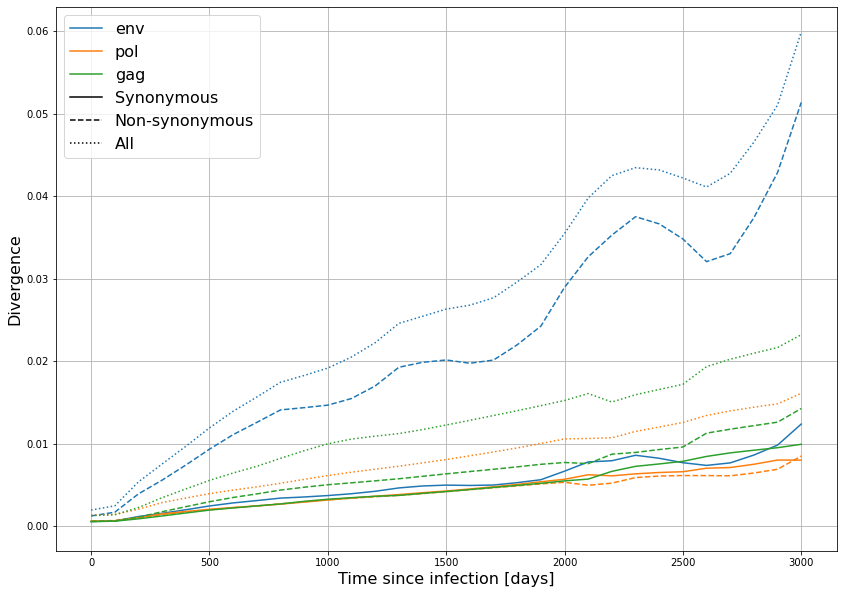

In [3]:
# Syn non-syn temporary (denominator is not good)
colors = ["C0", "C1", "C2", "C3", "C4", "C5", "C6", "C7", "C8", "C9"]
fontsize = 16

plt.figure(figsize=(14, 10))
for ii, region in enumerate(["env", "pol", "gag"]):
    plt.plot(time_average, divergence_dict[region]["all"]["syn"], '-', color=colors[ii], label=region)
    plt.plot(time_average, divergence_dict[region]["all"]["non_syn"], '--', color=colors[ii])
    plt.plot(time_average, divergence_dict[region]["all"]["all"], ':', color=colors[ii])
plt.plot([0], [0], 'k-', label="Synonymous")
plt.plot([0], [0], 'k--', label="Non-synonymous")
plt.plot([0], [0], 'k:', label="All")
plt.grid()
plt.xlabel("Time since infection [days]", fontsize=fontsize)
plt.ylabel("Divergence", fontsize=fontsize)
plt.legend(fontsize=fontsize)
plt.show()

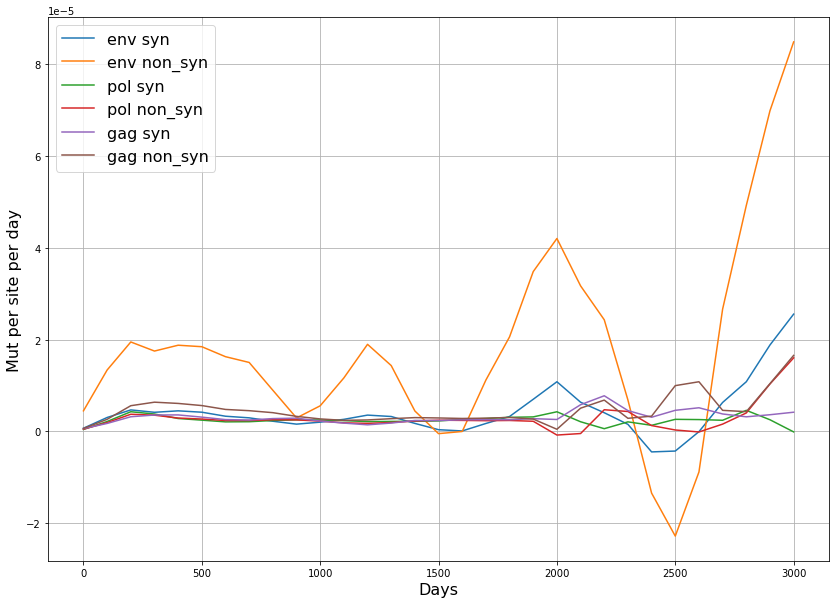

Evo rate env syn: 2.5111789799713205e-06
Evo rate env non_syn: 1.170590046879043e-05
Evo rate pol syn: 2.4166295445502257e-06
Evo rate pol non_syn: 2.2196400567400984e-06
Evo rate gag syn: 2.3310462518098634e-06
Evo rate gag non_syn: 3.1354506427990957e-06


In [6]:
# Evolution rate
evo_rate_dict = WH_evo_rate(divergence_dict, time_average)

regions = ["env", "pol", "gag"]
time_interval = [500, 2000]

plt.figure(figsize=(14,10))
for region in regions:
    for mut_type in ["syn", "non_syn"]:
        plt.plot(time_average, evo_rate_dict[region][mut_type], label=region + " " + mut_type)
plt.grid()
# plt.yscale("log")
plt.legend(fontsize=16)
plt.xlabel("Days", fontsize=16)
plt.ylabel("Mut per site per day", fontsize=16)
plt.show()

for region in regions:
    for mut_type in ["syn", "non_syn"]:
        evo_rate = evo_rate_dict[region][mut_type]
        evo_rate = evo_rate[np.logical_and(time_average>time_interval[0],time_average<time_interval[1])]
        evo_rate = np.mean(evo_rate)
        print(f"Evo rate {region} {mut_type}: {evo_rate}")

# By position

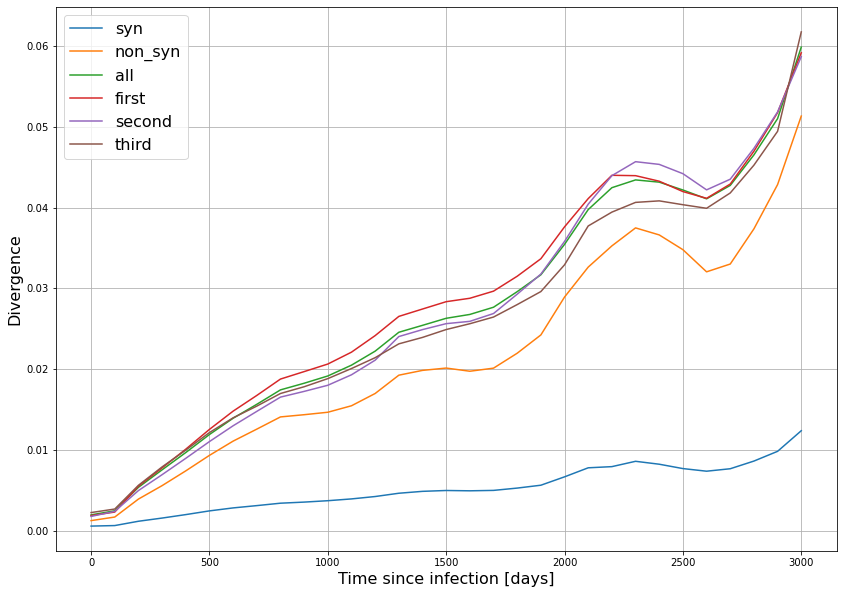

In [6]:
fontsize=16

plt.figure(figsize=(14, 10))
region = "env"
plt.plot(time_average, divergence_dict[region]["all"]["syn"], label="syn")
plt.plot(time_average, divergence_dict[region]["all"]["non_syn"], label="non_syn")
plt.plot(time_average, divergence_dict[region]["all"]["all"], label="all")
plt.plot(time_average, divergence_dict[region]["all"]["first"], label="first")
plt.plot(time_average, divergence_dict[region]["all"]["second"], label="second")
plt.plot(time_average, divergence_dict[region]["all"]["third"], label="third")
plt.grid()
plt.xlabel("Time since infection [days]", fontsize=fontsize)
plt.ylabel("Divergence", fontsize=fontsize)
plt.legend(fontsize=fontsize)
plt.show()

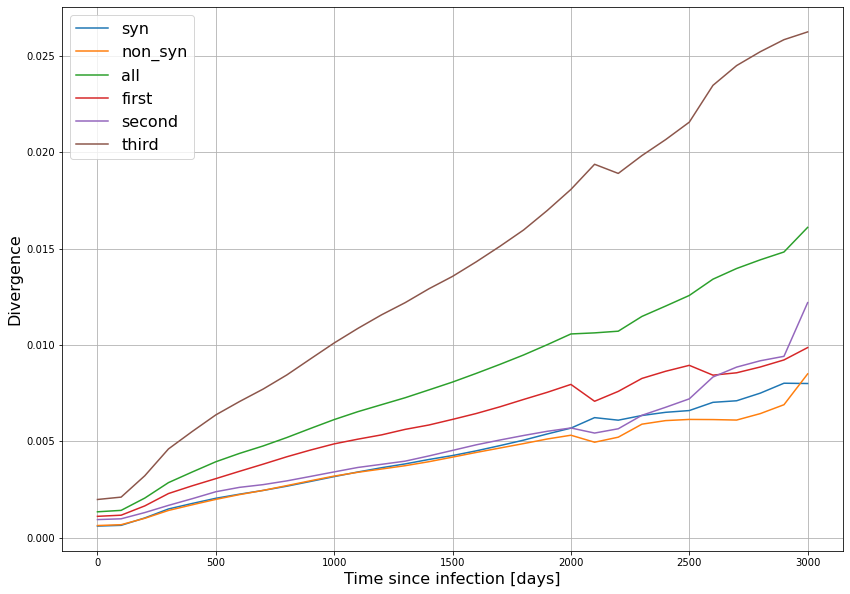

In [7]:
plt.figure(figsize=(14, 10))
region = "pol"
plt.plot(time_average, divergence_dict[region]["all"]["syn"], label="syn")
plt.plot(time_average, divergence_dict[region]["all"]["non_syn"], label="non_syn")
plt.plot(time_average, divergence_dict[region]["all"]["all"], label="all")
plt.plot(time_average, divergence_dict[region]["all"]["first"], label="first")
plt.plot(time_average, divergence_dict[region]["all"]["second"], label="second")
plt.plot(time_average, divergence_dict[region]["all"]["third"], label="third")
plt.grid()
plt.xlabel("Time since infection [days]", fontsize=fontsize)
plt.ylabel("Divergence", fontsize=fontsize)
plt.legend(fontsize=fontsize)
plt.show()

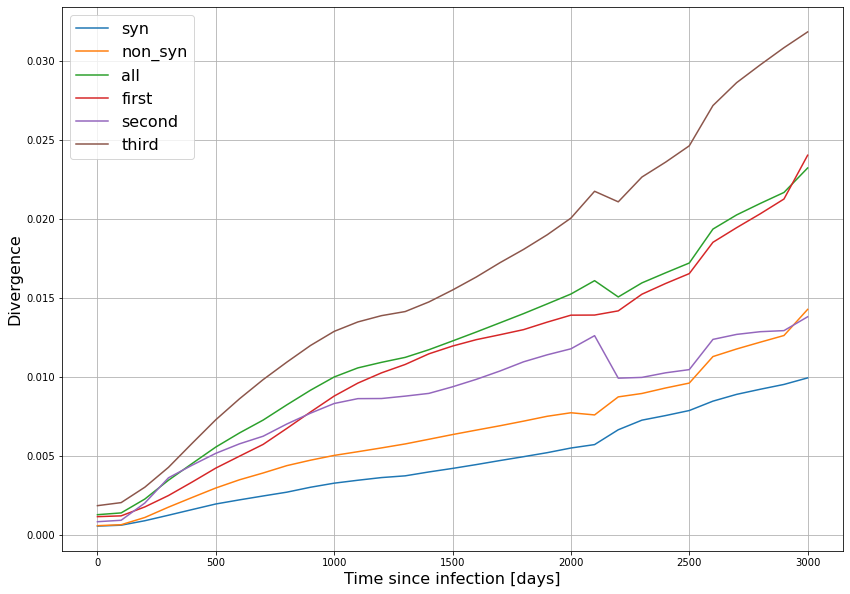

In [8]:
plt.figure(figsize=(14, 10))
region = "gag"
plt.plot(time_average, divergence_dict[region]["all"]["syn"], label="syn")
plt.plot(time_average, divergence_dict[region]["all"]["non_syn"], label="non_syn")
plt.plot(time_average, divergence_dict[region]["all"]["all"], label="all")
plt.plot(time_average, divergence_dict[region]["all"]["first"], label="first")
plt.plot(time_average, divergence_dict[region]["all"]["second"], label="second")
plt.plot(time_average, divergence_dict[region]["all"]["third"], label="third")
plt.grid()
plt.xlabel("Time since infection [days]", fontsize=fontsize)
plt.ylabel("Divergence", fontsize=fontsize)
plt.legend(fontsize=fontsize)
plt.show()

# Combination of syn and rev

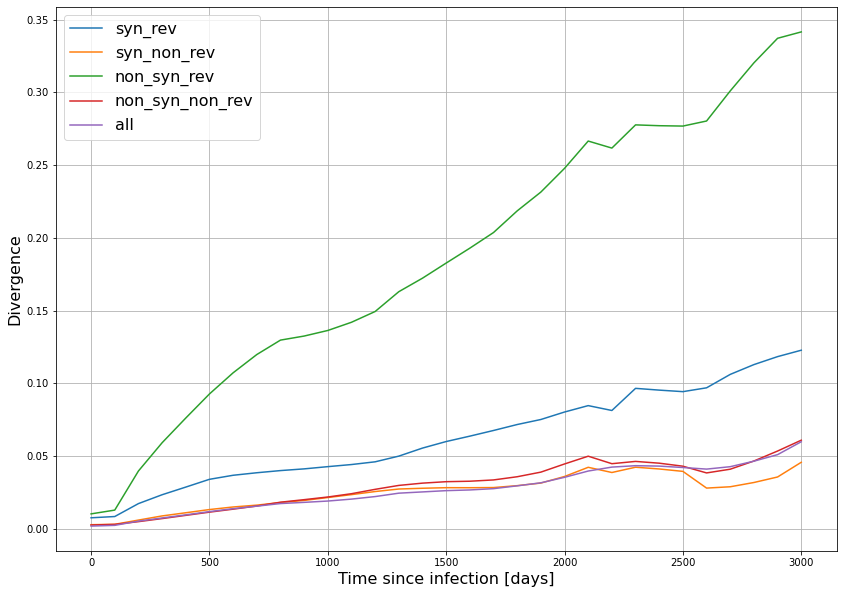

In [3]:
fontsize=16
plt.figure(figsize=(14, 10))
region = "env"
plt.plot(time_average, divergence_dict[region]["all"]["syn_rev"], label="syn_rev")
plt.plot(time_average, divergence_dict[region]["all"]["syn_non_rev"], label="syn_non_rev")
plt.plot(time_average, divergence_dict[region]["all"]["non_syn_rev"], label="non_syn_rev")
plt.plot(time_average, divergence_dict[region]["all"]["non_syn_non_rev"], label="non_syn_non_rev")
plt.plot(time_average, divergence_dict[region]["all"]["all"], label="all")
plt.grid()
plt.xlabel("Time since infection [days]", fontsize=fontsize)
plt.ylabel("Divergence", fontsize=fontsize)
plt.legend(fontsize=fontsize)
plt.show()

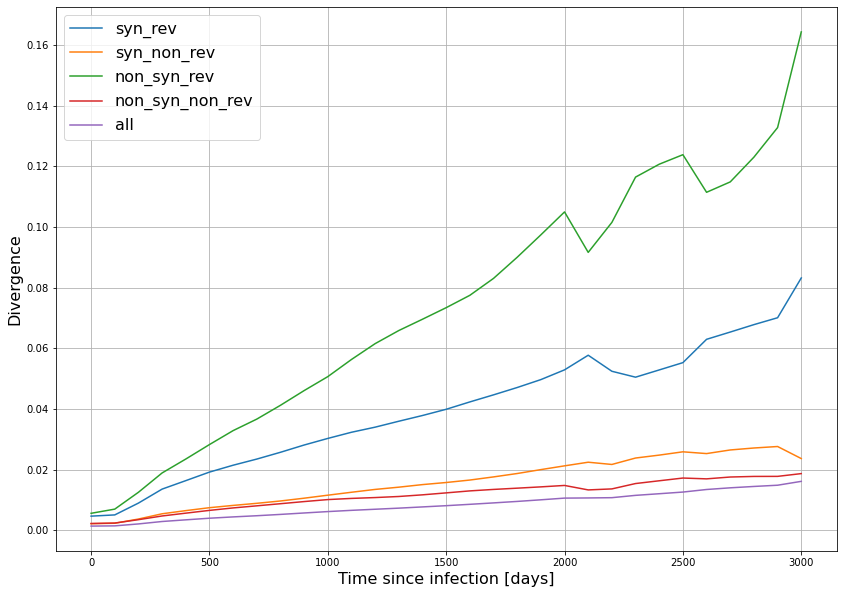

In [4]:
plt.figure(figsize=(14, 10))
region = "pol"
plt.plot(time_average, divergence_dict[region]["all"]["syn_rev"], label="syn_rev")
plt.plot(time_average, divergence_dict[region]["all"]["syn_non_rev"], label="syn_non_rev")
plt.plot(time_average, divergence_dict[region]["all"]["non_syn_rev"], label="non_syn_rev")
plt.plot(time_average, divergence_dict[region]["all"]["non_syn_non_rev"], label="non_syn_non_rev")
plt.plot(time_average, divergence_dict[region]["all"]["all"], label="all")
plt.grid()
plt.xlabel("Time since infection [days]", fontsize=fontsize)
plt.ylabel("Divergence", fontsize=fontsize)
plt.legend(fontsize=fontsize)
plt.show()

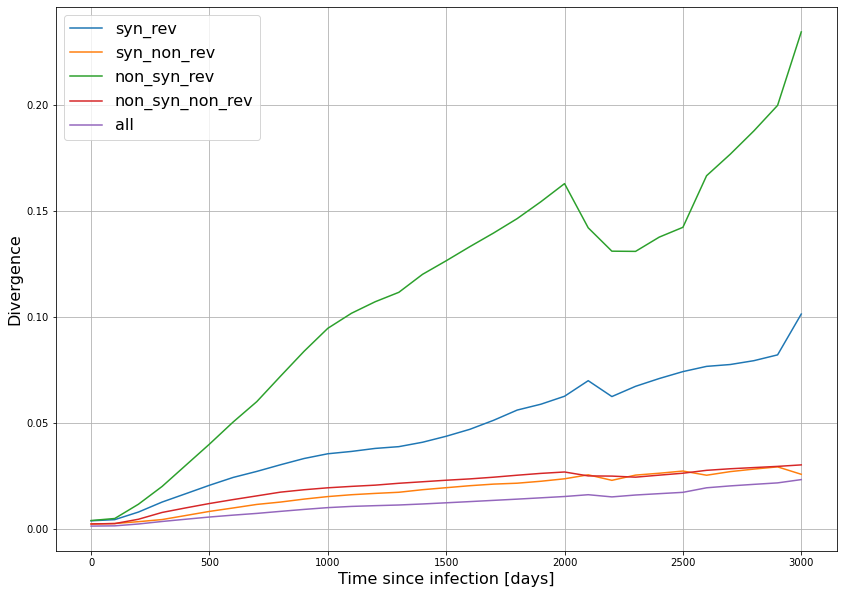

In [5]:
plt.figure(figsize=(14, 10))
region = "gag"
plt.plot(time_average, divergence_dict[region]["all"]["syn_rev"], label="syn_rev")
plt.plot(time_average, divergence_dict[region]["all"]["syn_non_rev"], label="syn_non_rev")
plt.plot(time_average, divergence_dict[region]["all"]["non_syn_rev"], label="non_syn_rev")
plt.plot(time_average, divergence_dict[region]["all"]["non_syn_non_rev"], label="non_syn_non_rev")
plt.plot(time_average, divergence_dict[region]["all"]["all"], label="all")
plt.grid()
plt.xlabel("Time since infection [days]", fontsize=fontsize)
plt.ylabel("Divergence", fontsize=fontsize)
plt.legend(fontsize=fontsize)
plt.show()